In [1]:
import pickle as pckl
import seaborn as sb
import pandas as pd
from datetime import datetime
import numpy as np

import seaborn as sb
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import DateFormatter

import windowing_function_vader

In [2]:
df = pckl.load(open('ARK_7day_vader.pckl','rb'))

In [3]:
params = {'game': 'ARK',
          'window_days': 7,
          'save_df': True,
          'shift': 1}

In [4]:
avg_sent_df = windowing_function_vader.window_vader(df, params)

In [5]:
avg_sent_df.head()

,time_of_review,review,upvoted,time_of_review_unix,minutes_played,upvotes_window,total_window,percent_window,norm_deriv,tokenized_review,neu_sent_nostop,neg_sent_nostop,pos_sent_nostop,comp_sent_nostop,neu_sent_raw,neg_sent_raw,pos_sent_raw,comp_sent_raw,comp_sent_raw_window,comp_sent_nostop_window
0,2015-06-02 22:29:25,"Its really good, only down side is you cant fo...",True,1.433284e+09,4578,1,1,1.0,0.0,really good side cant force feed poo people yet,0.715,0.000,0.285,0.4927,0.801,0.000,0.199,0.5400,0.540000,0.492700
1,2015-06-02 22:30:07,This game manages to make you feel all sorts o...,True,1.433284e+09,28946,2,2,1.0,0.0,game manages make feel sorts emotions short am...,0.748,0.086,0.166,0.6124,0.858,0.048,0.095,0.6476,0.053800,0.059850
2,2015-06-02 22:31:01,LOVE THIS !!!!,True,1.433284e+09,82165,3,3,1.0,0.0,love,0.000,0.000,1.000,0.6369,0.247,0.000,0.753,0.7964,0.085467,0.048067
3,2015-06-02 22:35:36,At the point of this recommendation being made...,True,1.433285e+09,664,4,4,1.0,0.0,point recommendation made ive played long easi...,0.657,0.000,0.343,0.7430,0.812,0.036,0.152,0.7033,0.040825,0.062575
4,2015-06-02 22:36:41,"""Since *that game we all know of"" vanished the...",True,1.433285e+09,43151,5,5,1.0,0.0,since *that game know vanished empty space din...,0.687,0.091,0.222,0.9646,0.828,0.043,0.129,0.9728,0.086560,0.094380


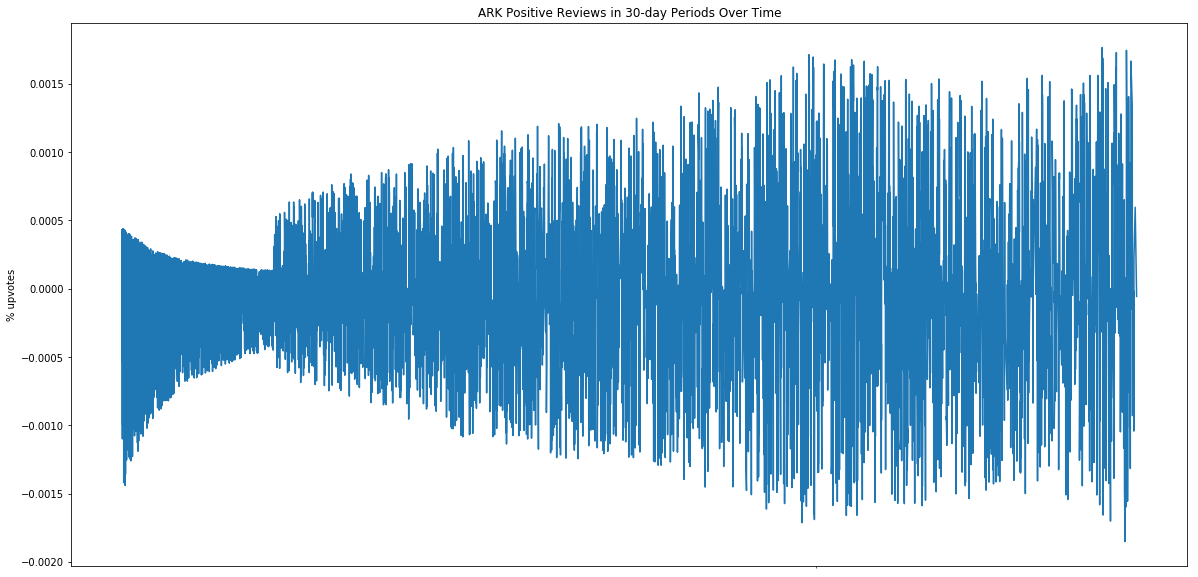

In [11]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

date = df['time_of_review'].iloc[1000:10000]
percent = df['percent_window'].iloc[1000:]

#comp_sent_raw = df['comp_sent_raw'].iloc[1000:]
#comp_sent_nostop = df['comp_sent_nostop'].iloc[1000:]
#pos_sent_nostop = df['pos_sent_nostop'].iloc[1000:]
#neg_sent_nostop = df['neg_sent_nostop'].iloc[1000:]

avg_sent_nostop = avg_sent_df['comp_sent_nostop_window'].iloc[1000:]
avg_sent_raw = avg_sent_df['comp_sent_raw_window'].iloc[1000:10000]


#total_sent = pos_sent_nostop - neg_sent_nostop - comp_sent_nostop

#ax = plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,10))

#ax.plot(date, percent, 'k', date, avg_sent_nostop, 'bs', date, avg_sent_raw, 'g^')
ax.plot(date, avg_sent_raw)


ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

plt.ylabel('% upvotes')
plt.title('ARK Positive Reviews in 30-day Periods Over Time')

plt.show()

In [103]:
a, b = [], []

In [105]:
b

[]

In [50]:
data = pd.DataFrame([])

a = np.diff(df['time_of_review_unix'], n=100)
b = np.diff(df['percent_upvotes'], n=100)*10000

data['z_p'] = b/a
#data['y_p'] = np.diff(df['percent_upvotes'],n=100) / np.diff(df['time_of_review_unix'],n=100)
#data['x_p'] = np.diff(df['time_of_review_unix'],n=100)
data['x_p'] = (np.array(df['time_of_review_unix'])[:-100] + np.array(df['time_of_review_unix'])[100:]) / 2

#data['y_p'] = data['y_p']/data['y_p'].max()

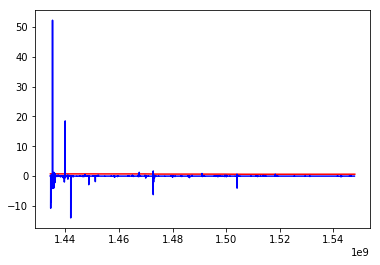

In [52]:
plt.figure(2)
plt.plot(df['time_of_review_unix'].iloc[5000:], df['percent_upvotes'].iloc[5000:], 'r')
plt.plot(data['x_p'][5000:], data['z_p'][5000:], 'b')

plt.show()

In [42]:
a = np.diff(df['time_of_review_unix'])
b = np.diff(df['percent_upvotes'])*10000

In [43]:
b[0:10]

array([    0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        , -1250.        ,   138.88888889,
        -888.88888889,  -727.27272727])